In [1]:
%matplotlib inline
import os
import wget
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def download(param):
    for ix, band in enumerate(param['bands']):
        file = param['folder'] + '_B' + str(band) + '.TIF'
        if file not in os.listdir():
            url = '/'.join([param['url_path'],
                            param['folder'],
                            file])
            wget.download(url)
        else:
            print('File {} already exists'.format(file))

# http://landsat-pds.s3.amazonaws.com/c1/L8/220/079/LC08_L1TP_220079_20170428_20170515_01_T1/LC08_L1TP_220079_20170428_20170515_01_T1_B4.TIF

In [3]:
param = {'url_path': 'http://landsat-pds.s3.amazonaws.com/c1/L8/220/079',
         'folder': 'LC08_L1TP_220079_20170428_20170515_01_T1',
         'bands': [2, 3, 4, 5]}

download(param)

File LC08_L1TP_220079_20170428_20170515_01_T1_B2.TIF already exists
File LC08_L1TP_220079_20170428_20170515_01_T1_B3.TIF already exists
File LC08_L1TP_220079_20170428_20170515_01_T1_B4.TIF already exists
File LC08_L1TP_220079_20170428_20170515_01_T1_B5.TIF already exists


In [4]:
with rasterio.open('LC08_L1TP_220079_20170428_20170515_01_T1_B2.TIF') as file:
    img_blue = (file.read(1) / 256).astype(np.uint8)

with rasterio.open('LC08_L1TP_220079_20170428_20170515_01_T1_B3.TIF') as file:
    img_green = (file.read(1) / 256).astype(np.uint8)

with rasterio.open('LC08_L1TP_220079_20170428_20170515_01_T1_B4.TIF') as file:
    img_red = (file.read(1) / 256).astype(np.uint8)

#with rasterio.open('LC08_L1TP_220079_20170428_20170515_01_T1_B5.TIF') as file:
#    img_nir = file.read(1)

In [5]:
def ndvi(red, nir):
    band_sum = nir + red
    band_dif = nir - red
    
    # Necessary to avoid zero division.
    # Add 1 to a cell with zero.
    is_zero = band_sum == 0
    band_sum = band_sum + is_zero

    return band_dif / band_sum

In [18]:
img_ndvi = ndvi(img_red, img_nir) > 0.75

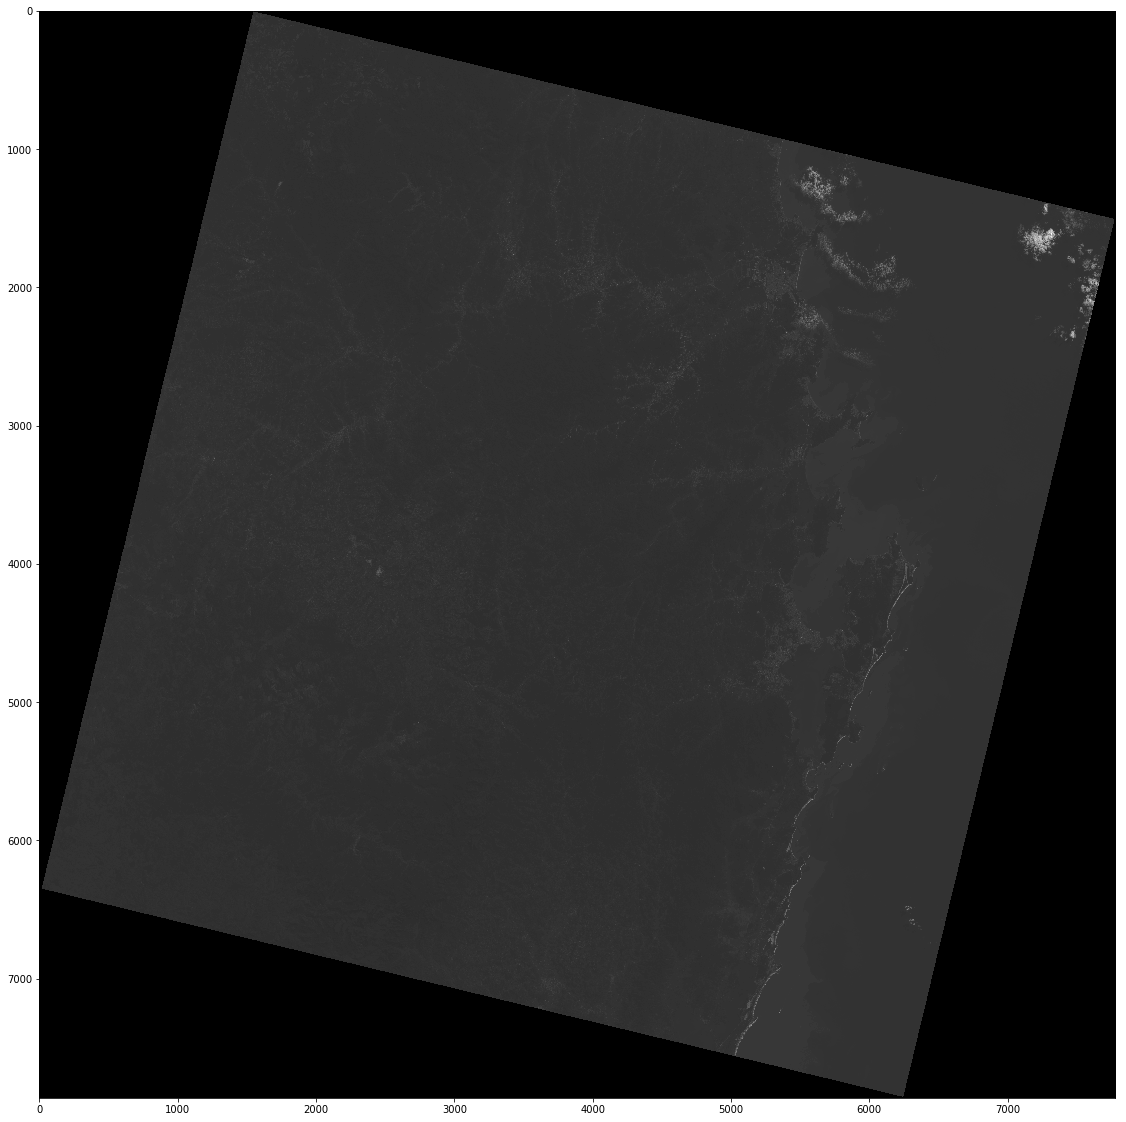

In [58]:
plt.figure(figsize=(20,20))
plt.imshow()
#plt.imshow(img_blue, cmap='gray')

In [59]:
np.array([img_red, img_green, img_blue]).transpose(1, 2, 0).shape

(7861, 7781, 3)